# Notebook For Experimenting With Network Architectures
## 13.01.2020
### Jonah Gourlay

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
import logging
import sys

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

handler = logging.StreamHandler(sys.stdout)

formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

logger.handlers = [handler]

torch.Size([3, 20, 20])

matplotlib.font_manager - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
matplotlib.font_manager - DEBUG - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) no

matplotlib.font_manager - DEBUG - findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 11.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Umpush' (Umpush-Oblique.ttf) oblique normal 400 normal>) = 11.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Mukti Narrow' (MuktiNarrow.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Gubbi' (Gubbi.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 4

matplotlib.font_manager - DEBUG - findfont: score(<Font 'mry_KacstQurn' (mry_KacstQurn.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Noto Serif CJK JP' (NotoSerifCJK-Regular.ttc) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Laksaman' (Laksaman-Italic.ttf) italic normal 400 normal>) = 11.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal bold normal>) = 10.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Khmer OS System' (KhmerOSsys.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Norasi' (Norasi-Bold.ttf) normal normal bold normal>) = 10.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal bold normal>) = 11.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Tlwg Typo' (TlwgTypo-BoldOblique.ttf) oblique normal b

matplotlib.font_manager - DEBUG - findfont: score(<Font 'KacstBook' (KacstBook.ttf) normal normal book normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Bold.ttc) normal normal bold normal>) = 10.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'KacstPen' (KacstPen.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Nakula' (nakula.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Uroob' (Uroob.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Lohit Tamil Classical' (Lohit-Tamil-Classical.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager - DEBUG - findfont: score(<Font 'Suruma' (Suruma.ttf) normal normal 400 normal>) = 10.05
matplot

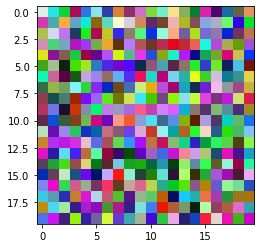

In [3]:
img = np.random.rand(1,4,20,20)

plt.imshow(img[0,:3,:,:].reshape(20,20,3))

img_x = img.shape[0]
img_y = img.shape[1]

device = "cpu"

img_tensor = torch.tensor(img, device=device).float()
img_tensor[0,:3].shape

In [4]:
import sys
sys.path.append('../lib/fusenet-pytorch/')

from models import networks
from models.networks import FusenetGenerator

In [5]:
#import detectron2
#from detectron2 import _C

In [6]:
from models.fusenet_model import FuseNetModel
from data.image_folder import ImageFolder, make_dataset
from data.base_dataset import BaseDataset
import torchvision.transforms as transforms
import cv2
from PIL import Image

In [7]:
class options(object):
    
    def __init__(self):
        self.gpu_ids = []
        self.isTrain = False
        self.checkpoints_dir = './checkpoints'
        self.name = 'experiment'
        self.resize_or_crop = 'none'
        self.batch_size = 4
        self.serial_batches = 'store_true'
        self.num_threads = 8
        self.dataroot = '../img'
        self.norm = 'instance'
        self.no_dropout = 'store_true'
        self.init_type = 'kaiming'
        self.init_gain = 0.02
        

In [38]:
class image_dataset(ImageFolder):
    
    def initialize(self, opt):
        self.opt = opt
        self.batch_size = opt.batch_size
        self.root = opt.dataroot
        self.num_labels = 1
        self.ignore_label = 1
        self.class_weights = None
        
        image_set = ImageFolder(self.root)
        
        self.images = image_set.imgs
    
    def __getitem__(self, index):
        
        path = self.imgs[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        
        img_np = cv2.imread(path)
        
        shape = img_np.shape
        
        depth_image = np.random.rand(shape[0], shape[1]).astype(np.double)
        #depth_image = np.expand_dims(depth_image, axis=3)
        mask = np.random.randn(200,200)
        
        rgb_image = transforms.ToTensor()(img)
        
        depth_image = torch.tensor(depth_image, dtype=torch.double).float()
        
        mask = torch.from_numpy(mask)
        mask = mask.type(torch.LongTensor)
        
        rgb_image = rgb_image.reshape(1,3,200,200)
        depth_image = depth_image.reshape(1,1,200,200)
        mask = mask.reshape(1,1,200,200)
        
        return {'rgb_image': rgb_image, 'depth_image': depth_image, 'mask': mask, 'path': path}

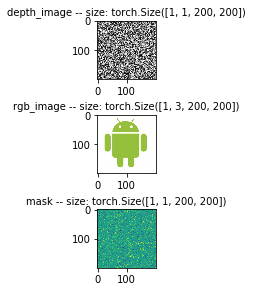

In [41]:
fusenet = FuseNetModel()

opt = options()

dataset = image_dataset(opt.dataroot)

dataset.initialize(opt)

data = dataset.__getitem__(0)
depth_image = data['depth_image']
rgb_image = data['rgb_image']
mask = data['mask']

figure, axes = plt.subplots(nrows=3, ncols=1, squeeze=False)

axes[0,0].imshow(depth_image[0,0,:,:], 'binary')
axes[0,0].set_title('depth_image -- size: ' + str(depth_image.size()), fontsize=10)

axes[1,0].imshow(rgb_image[0,:,:,:].permute(1,2,0))
axes[1,0].set_title('rgb_image -- size: ' + str(rgb_image.size()), fontsize=10)

axes[2,0].imshow(mask[0,0,:,:])
axes[2,0].set_title('mask -- size: ' + str(mask.size()), fontsize=10)

figure.tight_layout(pad=0.5)

In [43]:
fusenet.initialize(opt, dataset)
fusenet.set_input(dataset.__getitem__(0))
fusenet.forward()

initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network with pretrained
initialize network w

RuntimeError: Found an invalid max index: 597 (output volumes are of size 24x24